<a href="https://colab.research.google.com/github/springboardmentor458/OBJECT_RECOGNITION_SYSTEM_Infosys_Internship_Oct2024/blob/Irene-Thomas/Yolo_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()  # Correct spelling


YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [2]:
!nvidia-smi

Thu Nov 28 14:18:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

2024-11-28 14:18:59.890715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 14:18:59.911508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 14:18:59.918683: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, opti

In [4]:
!python export.py --weights yolov5s.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['yolov5s.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs

PyTorch: starting from yolov5s.pt with output shape (1, 25200, 85) (14.1 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 4.1s, saved as yolov5s.torchscript (28.1 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 281.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.2s, installed 1 

In [5]:
!python val.py --weights runs/train/exp/weights/best.pt --data coco128.yaml --img 640


val: data=/content/yolov5/data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:05<00:00,  1.28s/it]
                   all        128        929      0.737      0.636      0.724      0.484
Speed: 0.4ms pre-process, 8.6ms inference, 12.3ms NMS per image at shape (32, 3, 640, 640)
Results 

In [6]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source data/images


detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 49.7ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 3 ties, 65.5ms
Speed: 0.5ms pre-process, 57.6ms inference, 550.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to 

In [7]:
!python train.py --img 640 --batch 16 --epochs 50 --data custom_data.yaml --weights yolov5s.pt --cache


2024-11-28 14:21:02.381978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 14:21:02.404794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 14:21:02.411921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False,

In [8]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/drive/MyDrive/Colab\ Notebooks/Object\ Recognition\ Dataset/custom_data.yaml --img 640


Traceback (most recent call last):
  File "/content/yolov5/val.py", line 603, in <module>
    opt = parse_opt()
  File "/content/yolov5/val.py", line 541, in parse_opt
    opt.data = check_yaml(opt.data)  # check YAML
  File "/content/yolov5/utils/general.py", line 479, in check_yaml
    return check_file(file, suffix)
  File "/content/yolov5/utils/general.py", line 507, in check_file
    assert len(files), f"File not found: {file}"  # assert file was found
AssertionError: File not found: /content/drive/MyDrive/Colab Notebooks/Object Recognition Dataset/custom_data.yaml


In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '/content/drive/MyDrive/Colab Notebooks/Object Recognition Dataset/val2017'


Streaming output truncated to the last 5000 lines.
image 12/5009 /content/drive/.shortcut-targets-by-id/1MhS-eGs1AbJuIV9BfPoUWidhJOdVMqw2/Object Recognition Dataset/val2017/000000001296.jpg: 640x448 4 persons, 1 bottle, 1 cell phone, 9.1ms
image 13/5009 /content/drive/.shortcut-targets-by-id/1MhS-eGs1AbJuIV9BfPoUWidhJOdVMqw2/Object Recognition Dataset/val2017/000000001353.jpg: 640x480 5 persons, 1 suitcase, 1 chair, 9.3ms
image 14/5009 /content/drive/.shortcut-targets-by-id/1MhS-eGs1AbJuIV9BfPoUWidhJOdVMqw2/Object Recognition Dataset/val2017/000000001425.jpg: 512x640 1 bowl, 1 sandwich, 9.8ms
image 15/5009 /content/drive/.shortcut-targets-by-id/1MhS-eGs1AbJuIV9BfPoUWidhJOdVMqw2/Object Recognition Dataset/val2017/000000001490.jpg: 320x640 1 person, 33.3ms
image 16/5009 /content/drive/.shortcut-targets-by-id/1MhS-eGs1AbJuIV9BfPoUWidhJOdVMqw2/Object Recognition Dataset/val2017/000000001503.jpg: 480x640 1 tv, 1 laptop, 2 mouses, 2 keyboards, 1 cell phone, 9.8ms
image 17/5009 /content/drive

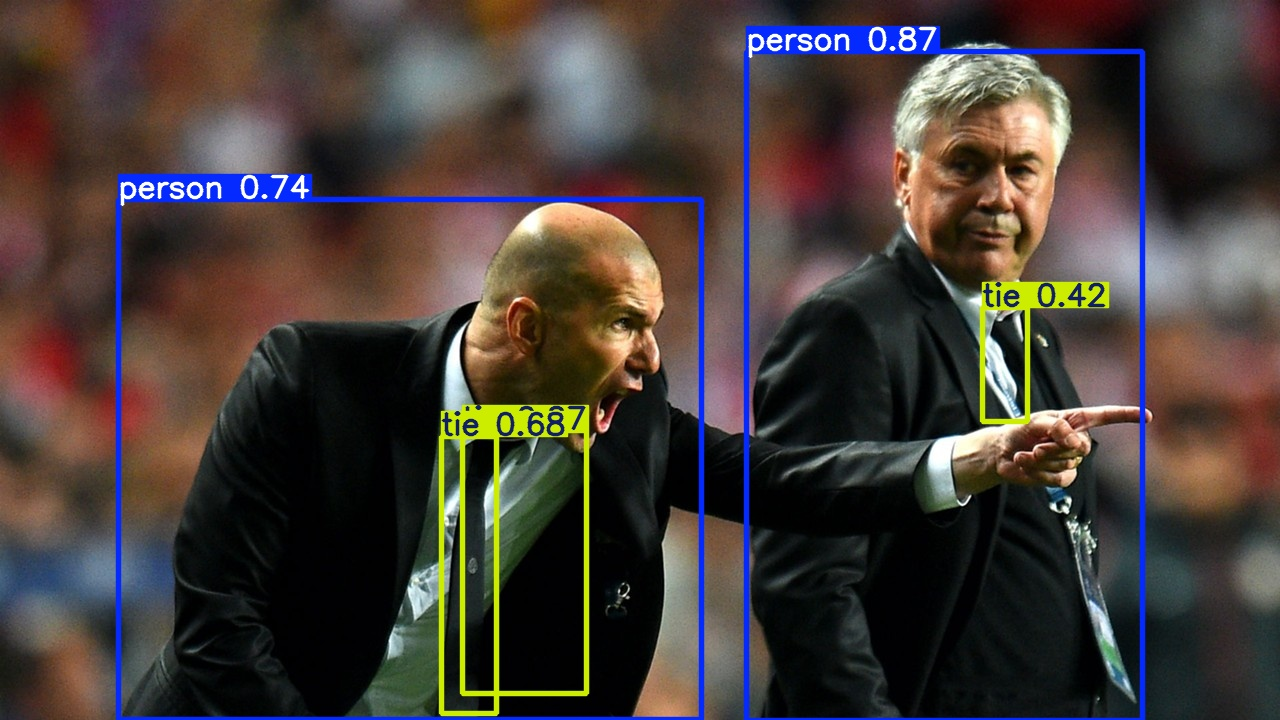

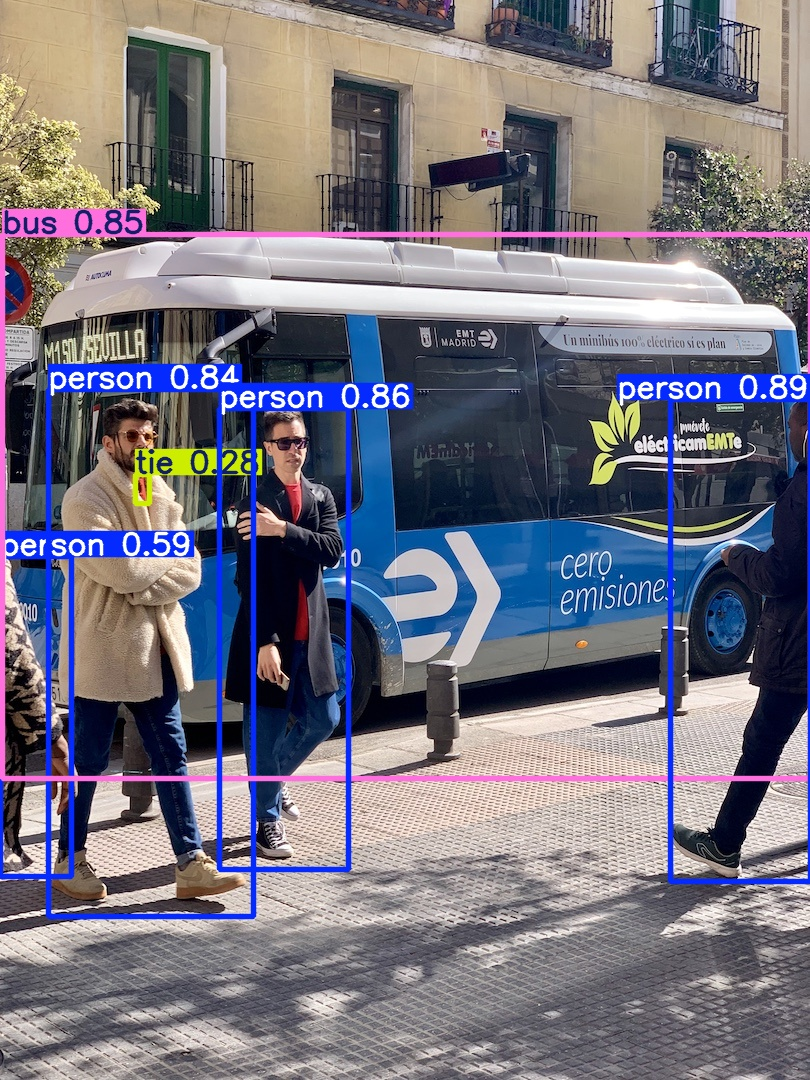

In [10]:
from IPython.display import Image, display
import glob

# Adjust the path if necessary
detection_images = glob.glob('runs/detect/exp/*.jpg')  # Output image directory
for image in detection_images:
    display(Image(filename=image))


usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE] [--data DATA]
                 [--imgsz IMGSZ [IMGSZ ...]] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img] [--save-txt]
                 [--save-format SAVE_FORMAT] [--save-csv] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms] [--augment] [--visualize]
                 [--update] [--project PROJECT] [--name NAME] [--exist-ok]
                 [--line-thickness LINE_THICKNESS] [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: Notebooks/Object Recognition Dataset/val2017


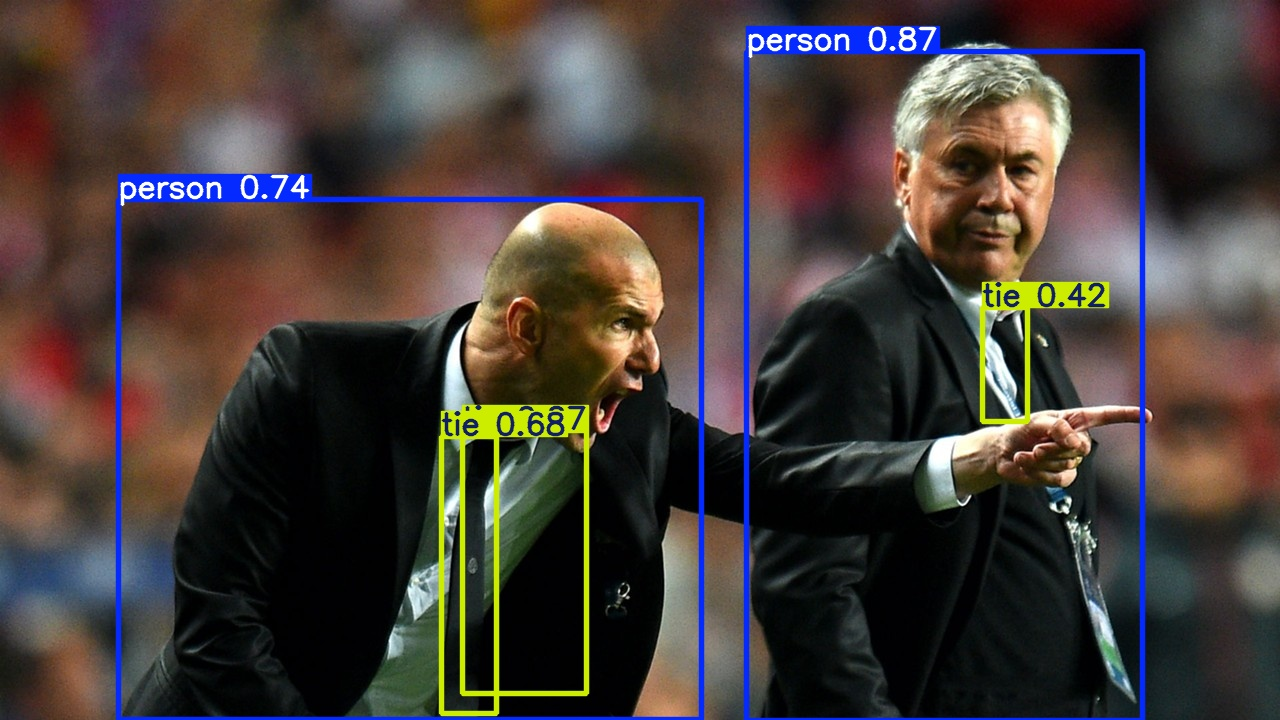

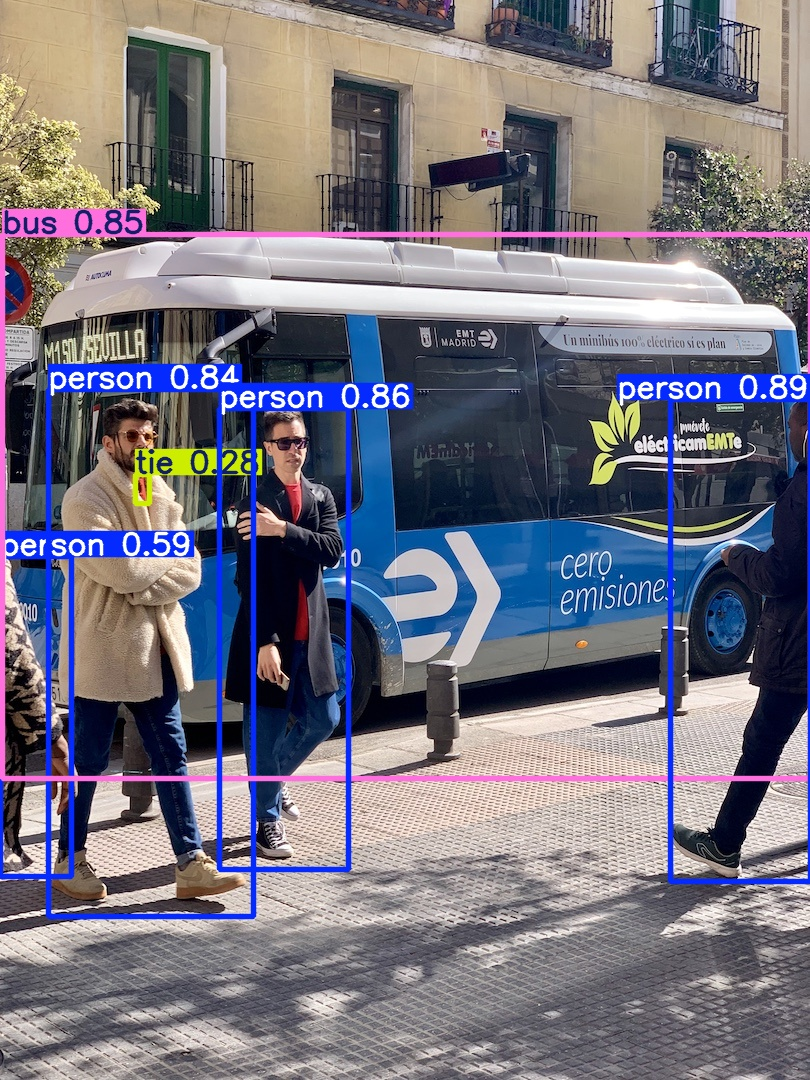

In [13]:
import os
from IPython.display import Image, display

# Path to dataset
image_folder = '/content/drive/MyDrive/Colab Notebooks/Object Recognition Dataset/val2017'
result_folder = 'runs/detect/exp'

# Run YOLOv5 detect.py for all images
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source {image_folder}

# Display results
detection_images = glob.glob(f'{result_folder}/*.jpg')
for image in detection_images:
    display(Image(filename=image))
